<a href="https://colab.research.google.com/github/rouchi-11/Image_Processing/blob/main/Assignment_4/Assignment_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Saving Screenshot 2025-10-03 113225.png to Screenshot 2025-10-03 113225 (2).png


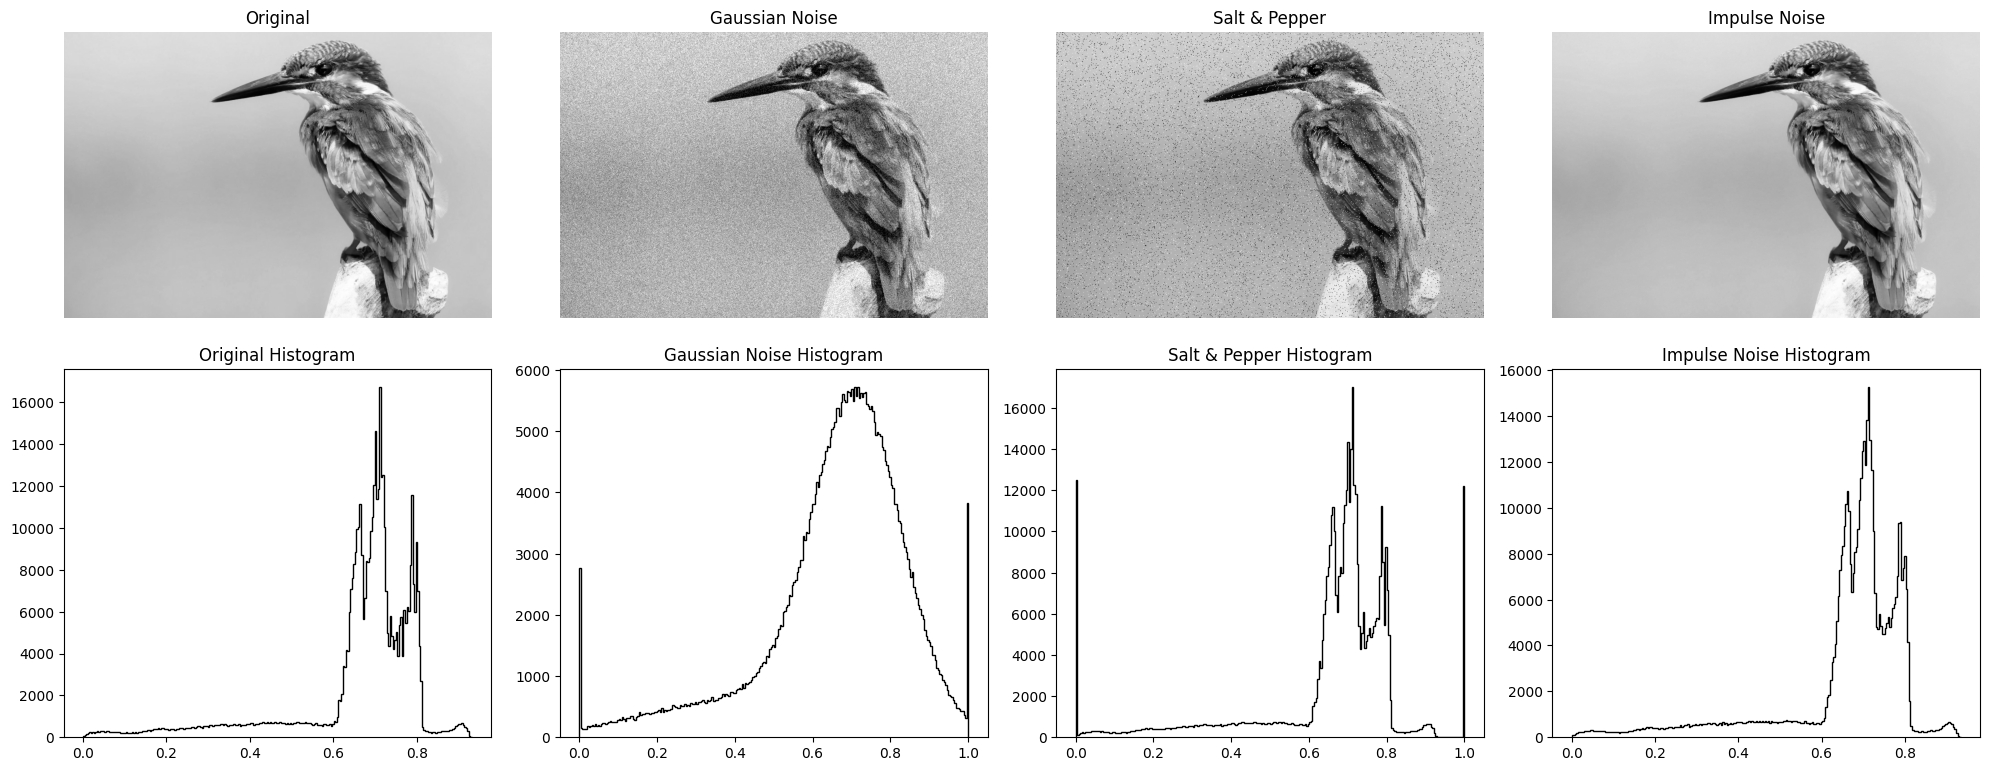

In [ ]:
# Install required libraries
!pip install scikit-image matplotlib numpy

import numpy as np
import matplotlib.pyplot as plt
from skimage import io, img_as_float, util, color
from google.colab import files

# Upload image
uploaded = files.upload()

# Read uploaded image (first one)
image_path = list(uploaded.keys())[0]
image = io.imread(image_path)

# Handle RGBA → RGB
if image.shape[-1] == 4:
    image = image[:, :, :3]  # drop alpha channel

# Convert to grayscale
if len(image.shape) == 3:
    image = color.rgb2gray(image)

image = img_as_float(image)

# Create noisy versions
gaussian_noisy = util.random_noise(image, mode='gaussian', var=0.01)
sp_noisy = util.random_noise(image, mode='s&p', amount=0.05)
impulse_noisy = util.random_noise(image, mode='poisson')

# Store results
images = [image, gaussian_noisy, sp_noisy, impulse_noisy]
titles = ["Original", "Gaussian Noise", "Salt & Pepper", "Impulse Noise"]

# Plot Images Horizontally
fig, axes = plt.subplots(2, 4, figsize=(20,8))

for i, (img, title) in enumerate(zip(images, titles)):
    # Show image
    axes[0, i].imshow(img, cmap='gray')
    axes[0, i].set_title(title)
    axes[0, i].axis('off')

    # Show histogram
    axes[1, i].hist(img.ravel(), bins=256, histtype='step', color='black')
    axes[1, i].set_title(title + " Histogram")

plt.tight_layout()
plt.show()


=